In [49]:
from ftpr.dataloader import load_phases
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import pickle
from ftpr.clustering import PhaseClustering
import numpy as np
from dtaidistance.dtw_ndim import distance_matrix_fast
from tqdm import tqdm

In [2]:
team = 'Manchester City'
df = pd.read_csv(f'../data/team_phases/{team}.csv')
phases = load_phases(df, filter_static_events=True, min_phase_length=3, n_jobs=5)

/var/folders/tv/_qfcls8d76jd1sp6y_8qsd700000gn/T/ipykernel_2430/1670377221.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'../data/team_phases/{team}.csv')


# Kmeans

In [3]:
series = []
for phase in phases:
	s = phase.get_location_series(location_columns=['location'], remove_duplicates=True)
	series.append(np.array(s))

In [9]:
with open('elbow_method10-200-10.pkl', 'rb') as f:
    clusterings_200, inertias_200 = pickle.load(f)

len(clusterings_200), len(inertias_200)

(20, 20)

In [10]:
with open('elbow_method10-300-10.pkl', 'rb') as f:
    clusterings, inertias = pickle.load(f)

len(clusterings), len(inertias)

(10, 30)

In [11]:
clusterings = clusterings_200 + clusterings
len(clusterings)

30

In [12]:
def clustering_dict_to_list(cls_pred):
	total_num = 0
	for _, value in cls_pred.items():
		total_num += len(value)
	result = [0] * total_num
	for key, value in cls_pred.items():
		for id in value:
			result[id] = key
	return result

In [14]:
silhouettes = []
distance = distance_matrix_fast(series)
for clustering in clusterings:
    cls_pred = clustering_dict_to_list(clustering.cluster_idx)
    silhouettes.append(silhouette_score(distance, cls_pred, metric='precomputed'))
    
silhouettes

[0.2053344527453105,
 0.1778897528858257,
 0.14809563899673786,
 0.13639165190164973,
 0.1314179365820751,
 0.12677290138463285,
 0.12895908899446673,
 0.1239775044150228,
 0.12493803605784054,
 0.11799221363002264,
 0.12196442059161944,
 0.11953784594298272,
 0.11771123400151857,
 0.12005977744410927,
 0.11944744735847543,
 0.11632471223515561,
 0.11674732889919252,
 0.11824957110650067,
 0.11574540666210141,
 0.10781792274612392,
 0.10993551792282029,
 0.10883855057491862,
 0.11304071124956656,
 0.11273786459221279,
 0.10628357842372131,
 0.1083452932943045,
 0.1066172117464599,
 0.11053866646760845,
 0.10467631413971457,
 0.10220612253703816]

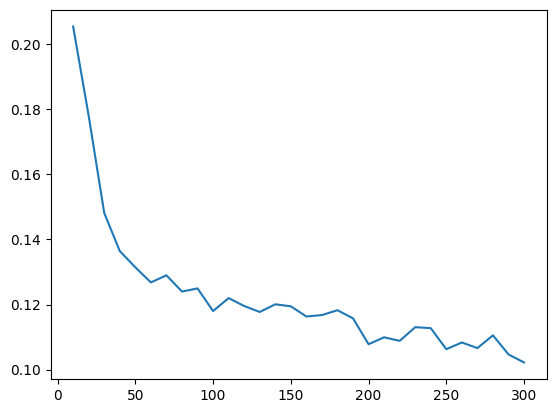

In [17]:
x = list(range(10, 301, 10))
plt.plot(x, silhouettes)

# Agglomerative

In [53]:
step = 5
min_clusters = 5
max_clusters = 300
n_clusters = min_clusters

In [54]:
distance = distance_matrix_fast(series)

In [55]:
silhouettes = []
labels = []
phase_clustering = PhaseClustering(phases)
for n_clusters in tqdm(range(min_clusters, max_clusters + 1, step)):
	cls_pred = phase_clustering.agglomerative_fit(n_clusters, 'dtw')
	labels.append(cls_pred)
	silhouettes.append(silhouette_score(distance, cls_pred, metric='precomputed'))

silhouettes

100%|██████████| 60/60 [01:22<00:00,  1.38s/it]


[0.16013814917615984,
 0.12496759469084961,
 0.133680580922312,
 0.1274567949841142,
 0.11546137382783918,
 0.11880853044778426,
 0.12166301325143165,
 0.09360355495591596,
 0.09908842948053131,
 0.10015040767230649,
 0.09968234368980568,
 0.1002573995886087,
 0.09678097955759536,
 0.0953352190531468,
 0.09256420963650658,
 0.09591613529129107,
 0.09070698277109707,
 0.09087596995021814,
 0.09142534157062232,
 0.09226862651355389,
 0.09180045894924782,
 0.09099307509366827,
 0.09124111171326256,
 0.09177253405606009,
 0.09204767187694891,
 0.09271807748867025,
 0.09288993018796479,
 0.08947997255802968,
 0.0898611399228009,
 0.08973734631095664,
 0.09043902814007412,
 0.08252607061083686,
 0.08350426539135046,
 0.08060295034442527,
 0.08098116429897217,
 0.0813103630860738,
 0.08088731458230661,
 0.07929330957085934,
 0.07853807119080475,
 0.07966979535123246,
 0.07973177994375648,
 0.08069280337228395,
 0.08372160086592594,
 0.08425575368547415,
 0.0857626431239019,
 0.087244815212264

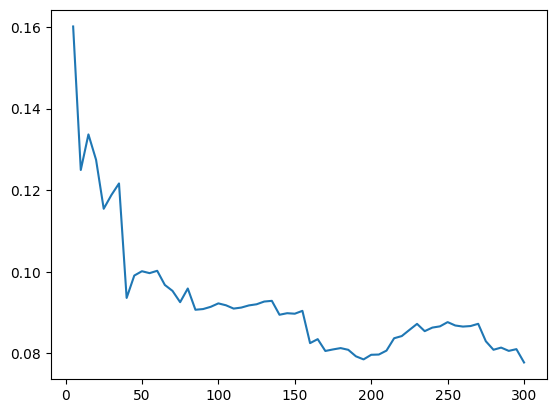

In [56]:
x = list(range(5, 301, 5))
plt.plot(x, silhouettes)

In [57]:
cls_pred = phase_clustering.agglomerative_fit(2, 'dtw')
result = silhouette_score(distance, cls_pred, metric='precomputed')

In [58]:
result

0.20456045238382958